In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 12,
        }

matplotlib.rc('font', **font)

In [8]:
matplotlib.rc('font', **font)

## Analysis for low and high benefit

In [9]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")
cmaps = [blues, reds]

In [10]:
expected_dfs = [pd.read_csv(f"../matlab/data/expected/clean_c_1_b_{b_val}_stochastic_0.csv") 
                for b_val in [3, 10]]

In [11]:
last_round_dfs = [pd.read_csv(f"../matlab/data/stochastic/clean_c_1_b_{b_val}_stochastic_1.csv") 
                  for b_val in [3, 10]]

In [12]:
heatmaps = []
extents = []

for exp, stoch in zip(expected_dfs, last_round_dfs):
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [13]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [14]:
min_, max_

(1.0, 1391629.0)

In [40]:
color = "#FDF6E3"

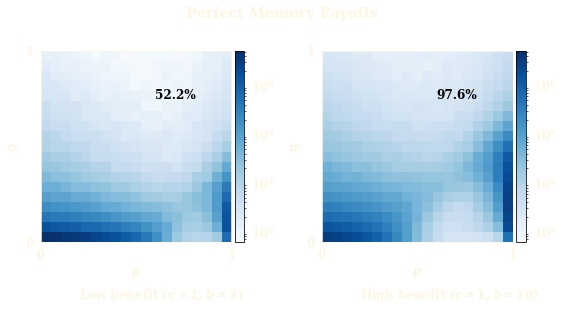

In [162]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

for i, heatmap in enumerate([heatmaps[0], heatmaps[2]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[0],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = plt.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$", color=color)
    axes[index].set_ylabel("$q$", color=color)
    
    cb.ax.yaxis.set_tick_params(color=color)
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color)


axes[0].text(0.2,
              -0.3,
              "Low benefit ($c=1, b=3$)",
              color=color,
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[0].text(0.6,
             0.75,
              "52.2%",
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[1].text(0.2,
              -0.3,
              "High benefit ($c=1, b=10$)",
              color=color,
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[1].text(0.6,
             0.75,
              "97.6%",
              rotation=0,
              weight='bold',
              fontsize=12,
          )

for ax in axes:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)


fig.suptitle(r"Perfect Memory Payoffs", weight="bold", y=.75, color=color);

fig.tight_layout();

fig.savefig("/Users/glynatsi/src/talks/talks/2022-01-18-Theory-Group-Talk/static/results_one.pdf")

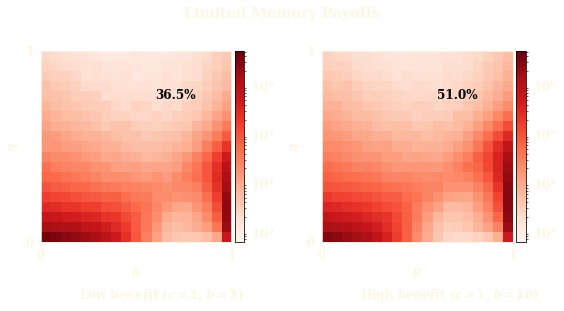

In [164]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

for i, heatmap in enumerate([heatmaps[1], heatmaps[3]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[1],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = plt.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$", color=color)
    axes[index].set_ylabel("$q$", color=color)
    
    cb.ax.yaxis.set_tick_params(color=color)
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=color)


axes[0].text(0.2,
              -0.3,
              "Low benefit ($c=1, b=3$)",
              color=color,
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[0].text(0.6,
             0.75,
              "36.5%",
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[1].text(0.2,
              -0.3,
              "High benefit ($c=1, b=10$)",
              color=color,
              rotation=0,
              weight='bold',
              fontsize=12,
          )

axes[1].text(0.6,
             0.75,
              "51.0%",
              rotation=0,
              weight='bold',
              fontsize=12,
          )

for ax in axes:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)


fig.suptitle(r"Limited Memory Payoffs", weight="bold", y=.75, color=color);

fig.tight_layout();

fig.savefig("/Users/glynatsi/src/talks/talks/2022-01-18-Theory-Group-Talk/static/results_two.pdf")

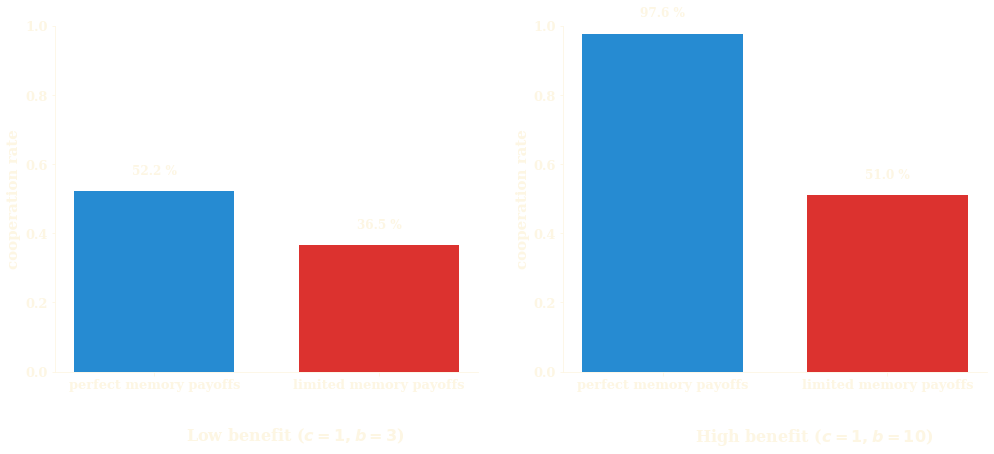

In [163]:
bars = ('perfect memory payoffs', 'limited memory payoffs')


fig, axes = plt.subplots(ncols=2, figsize=(14, 6.5));

for i in range(2):
    
    exp = expected_dfs[i]
    stoch = last_round_dfs[i]
    
    height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
          for df in [exp, stoch]]

    x_pos = np.arange(len(bars))
    
    axes[i].bar([0, 0.07], height, width=0.05,  color=["#268BD2", '#DC322F'])

    axes[i].set_ylabel("cooperation rate", weight="bold", fontsize=15);

    axes[i].set_ylim(0, 1);
#     axes[i].set_yticklabels([bars[0], bars[1]], fontsize=13);
    axes[i].set_xticks([0, 0.07,]);
    axes[i].set_xticklabels([bars[0], bars[1]], fontsize=13);

#     plt.xticks([0, 0.1], bars);

    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);

    for j, pos in enumerate([0, 0.07]):
        axes[i].text(pos,
              height[j] + 0.05,
              f"{round(height[j], 3) * 100} %",
              horizontalalignment='center',
              color=color,
              weight='bold',
              fontsize=12
          )
        
    axes[i].tick_params(axis='both', which='major', labelsize=13)

for ax, label in zip(axes, ["Low benefit ($c=1, b=3$)", "High benefit ($c=1, b=10$)"]):    
    ax.text(0.01,  -.2, label, fontsize=16, color=color)

plt.tight_layout();
plt.subplots_adjust(wspace=.2)

for ax in axes:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)

plt.savefig("/Users/glynatsi/src/talks/talks/2022-01-18-Theory-Group-Talk/static/results_three.png",
            transparent=True, dpi=800)

## Analysis over parameters $b$ and $\beta$

### Benefit analysis

In [99]:
import re

start = 'b_'

In [100]:
csv_files = [f'../matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in range(2, 11)]
csv_files_lr = [f'../data/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [101]:
end = '_stochastic'

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [102]:
csv_files_lr = [f'../data/last-round/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [103]:
end = '.csv'
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file,)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [104]:
cooperation_rates = []
cooperation_rates_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [105]:
%%capture

generosity = []
generosity_stoch = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_stoch.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

### Strength of selection analysis 

In [106]:
betas = [0.01, 0.1, 1, 10, 100]
start = 'beta_'

In [107]:
csv_files = [f'../matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]
csv_files_lr = [f'../matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]

In [108]:
end = "_stochastic"

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [109]:
dfs_stoch = []

for file in csv_files_lr:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [110]:
cooperation_rates_beta = []
cooperation_rates_beta_expected = []

for exp, stoch in zip(dfs, dfs_stoch):
    
    cooperation_rates_beta_expected.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_beta.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [111]:
%%capture

generosity_beta = []
generosity_stoch_beta = []

for exp, stoch in zip(dfs, dfs_stoch):


    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_beta.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_stoch_beta.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

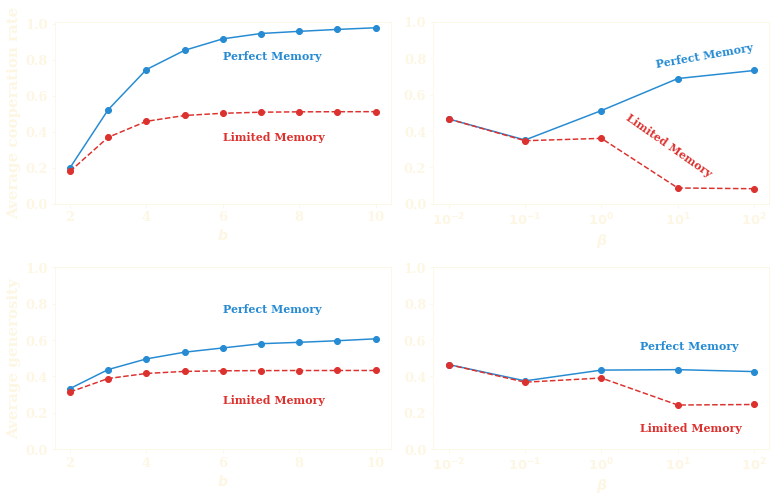

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))


axes[0, 0].plot(range(2, 11), cooperation_rates_expected, "-o", color="#268BD2", label="expected");
axes[0, 0].plot(range(2, 11), cooperation_rates, "--o", color='#DC322F', label="stochastic");

axes[0, 0].set_ylabel('Average cooperation rate', weight="bold", fontsize=15);
axes[0, 0].set_ylim(0, 1.01);
axes[0, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[0, 0].text(6, .8, "Perfect Memory", fontsize=11, color="#268BD2")
axes[0, 0].text(6, .35, "Limited Memory", fontsize=11, color='#DC322F');


axes[(0,0)].tick_params(axis='both', which='major', labelsize=13)


axes[1, 0].plot(range(2, 11), generosity, "-o", color="#268BD2", label="expected");
axes[1, 0].plot(range(2, 11), generosity_stoch, "--o", color='#DC322F', label="stochastic");
axes[1, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[1, 0].set_ylabel('Average generosity', weight="bold", fontsize=15);
axes[1, 0].set_ylim(0, 1);

axes[1, 0].text(6, .75, "Perfect Memory", fontsize=11, color="#268BD2")
axes[1, 0].text(6, .25, "Limited Memory", fontsize=11, color='#DC322F')

axes[(1,0)].tick_params(axis='both', which='major', labelsize=13)


axes[0, 1].plot(range(1, 6), cooperation_rates_beta_expected, "-o", color="#268BD2");
axes[0, 1].plot(range(1, 6), cooperation_rates_beta, "--o", color='#DC322F');
axes[0, 1].set_xlabel(r'$\beta$', weight="bold", fontsize=14);

axes[0, 1].set_xticks([1, 2, 3, 4, 5]);
axes[0, 1].set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes[0, 1].set_ylim(0, 1);
axes[0, 1].text(3.7, .75, "Perfect Memory", fontsize=11, color="#268BD2", rotation=10)
axes[0, 1].text(3.3, .15, "Limited Memory", fontsize=11, color='#DC322F', rotation=-35)

axes[(0, 1)].tick_params(axis='both', which='major', labelsize=13)
axes[(1, 1)].tick_params(axis='both', which='major', labelsize=13)

axes[(1, 1)].plot(range(1, 6), generosity_beta, "-o", color="#268BD2", label="expected");
axes[(1, 1)].plot(range(1, 6), generosity_stoch_beta, "--o", color='#DC322F', label="stochastic");
axes[(1, 1)].set_xlabel(r'$\beta$', weight="bold", fontsize=14);
axes[(1, 1)].set_ylim(0, 1);

axes[(1, 1)].text(3.5, .55, "Perfect Memory", fontsize=11, color="#268BD2")
axes[(1, 1)].text(3.5, .1, "Limited Memory", fontsize=11, color='#DC322F')

axes[(1, 1)].set_xticks([1, 2, 3, 4, 5]);
axes[(1, 1)].set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);
plt.tight_layout();

for ax in axes[0]:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)
    
for ax in axes[1]:
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)

plt.savefig("/Users/glynatsi/src/talks/talks/2022-01-18-Theory-Group-Talk/static/results_four.png", 
            bbox_inches='tight',
            transparent=True,
            dpi=800)

In [142]:
files = ["../data/clean_expected_b_10.csv", 
         "../data/last-round/clean_last_round_b_10.csv",
         "../data/clean_two_opponents_b_10.csv",
         "../data/clean_two_rounds_b_10.csv",
         "../data/clean_two_rounds_opponents_high_benefit.csv"]

In [146]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

In [147]:
dfs = [pd.read_csv(file) for file in files]

In [150]:
bar_colors = ["#268BD2", '#DC322F', '#859900', '#6C71C4', '#FFA500']

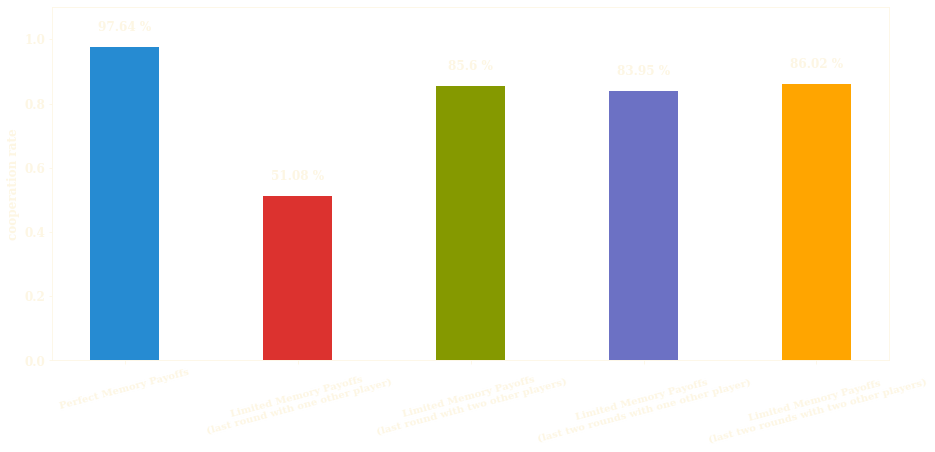

In [158]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10, rotation=15);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color=color,
          weight='bold',
          fontsize=12
      )

        

axes.spines['bottom'].set_color(color)
axes.spines['top'].set_color(color)
axes.spines['right'].set_color(color)
axes.spines['left'].set_color(color)
axes.xaxis.label.set_color(color)
axes.yaxis.label.set_color(color)
axes.tick_params(axis='x', colors=color)
axes.tick_params(axis='y', colors=color)


plt.savefig("/Users/glynatsi/src/talks/talks/2022-01-18-Theory-Group-Talk/static/results_five.png",
            bbox_inches='tight',
            transparent=True,
            dpi=800)